In [124]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/reddit-vaccine-myths/reddit_vm.csv


In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import string
from string import punctuation, digits
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer

warnings.filterwarnings("ignore")
%matplotlib inline

In [126]:
df = pd.read_csv('/kaggle/input/reddit-vaccine-myths/reddit_vm.csv')

In [127]:
df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28


In [128]:
df['score'].unique()

array([   7,    2,    6,    1,    5,   10,    0,    3,    4,    8,   -6,
         -1,   15,    9,   21,   11,   13,   37,   16,   17,   12,   30,
         20,   26,   23,   25,   28,   35,   22,   14,   24,   19,   29,
         18,   41, 1187,   -2,   -3,  -11,   -5,   -4,  -10])

In [129]:
#title with high score
print(df[df['score']==1187]['title'])

398    I would rage if this was handed to me...
Name: title, dtype: object


<AxesSubplot:xlabel='comms_num', ylabel='count'>

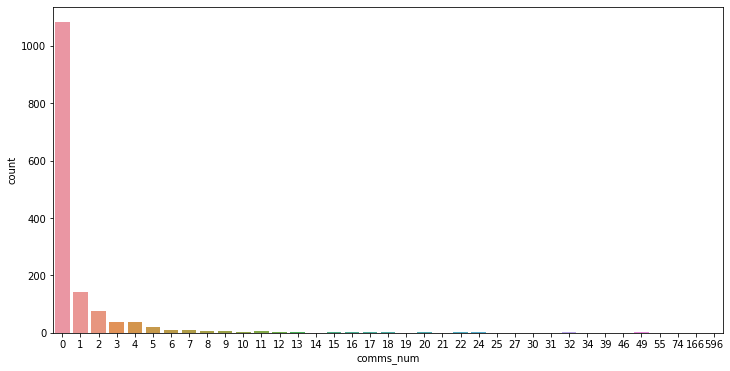

In [130]:
plt.figure(figsize=(12,6))
sns.countplot(df['comms_num'])

In [131]:
#high score and high comments
df[df['comms_num']==596]

,title,score,id,url,comms_num,created,body,timestamp
398,I would rage if this was handed to me...,1187,21zc6n,http://m.imgur.com/a/bZDWg,596,1.396435e+09,NaN,2014-04-02 13:32:42


<AxesSubplot:xlabel='score', ylabel='count'>

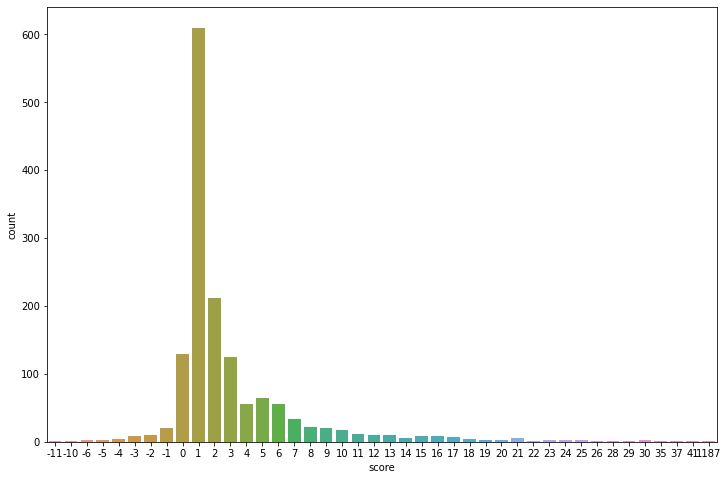

In [132]:
plt.figure(figsize=(12,8))
sns.countplot(df['score'])

In [133]:
#considering title without 'comment' or 'Comment'
title = df[(df['title'] != 'comment') & (df['title'] != 'Comment')]['title']
    

In [134]:
title

0      Health Canada approves AstraZeneca COVID-19 va...
1      COVID-19 in Canada: 'Vaccination passports' a ...
2      Coronavirus variants could fuel Canada's third...
3      Canadian government to extend COVID-19 emergen...
4      Canada: Pfizer is 'extremely committed' to mee...
                             ...                        
506    I am a father of five unvaccinated children. A...
507          Love Them. Protect Them. Never Inject Them.
508                 Vaccines Are Just Asping For Trouble
509    Dr. Harper explained in her presentation that ...
510    Polio arose in the US at a period where pestic...
Name: title, Length: 450, dtype: object

In [135]:
words = ''

#processing the title
for val in title:
        
        #remove numbers
        rm_num = ''.join(char for char in val if not char.isdigit())
        #remove puntuations
        rm_pun = ''.join(char for char in rm_num if char not in punctuation)
        
        # split the value 
        tokens = rm_pun.split() 
    
        # Converts each token into lowercase 
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower() 
    
        #exclude the extra words
        words += " ".join(word for word in tokens if word not in stopwords.words('english'))+" "

In [136]:
#Building wordcloud
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', colormap = 'rainbow',
                stopwords = stopwords, 
                min_font_size = 10).generate(words)

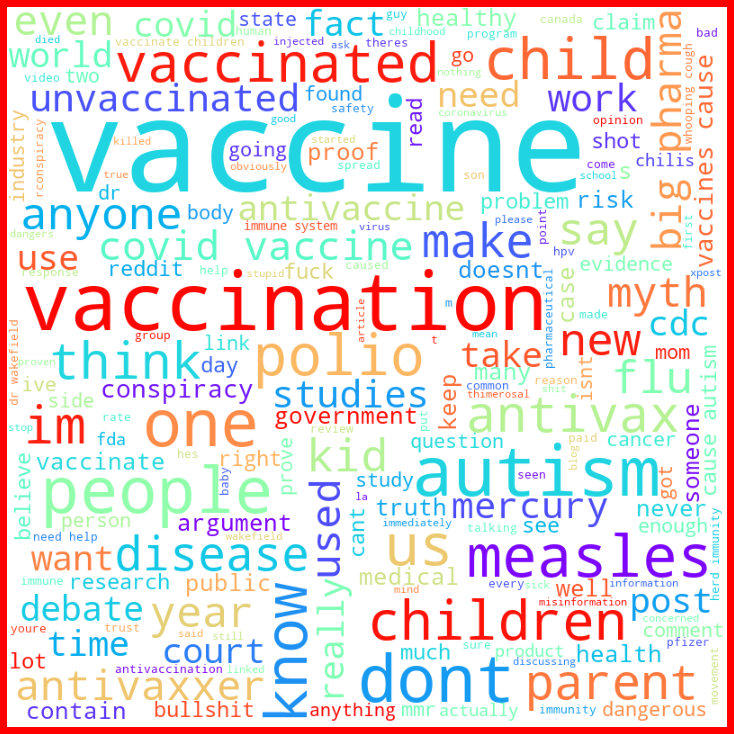

In [137]:
plt.figure(figsize = (10,10), facecolor = 'red') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [138]:
df = df[(df['title'] != 'comment') & (df['title'] != 'Comment')]

In [139]:
#Sentiment Analyser
sa = SentimentIntensityAnalyzer()
df['scores'] = df['title'].apply(lambda text: sa.polarity_scores(text))


In [140]:
df[['scores','title']]

,scores,title
0,"{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp...",Health Canada approves AstraZeneca COVID-19 va...
1,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",COVID-19 in Canada: 'Vaccination passports' a ...
2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Coronavirus variants could fuel Canada's third...
3,"{'neg': 0.239, 'neu': 0.367, 'pos': 0.394, 'co...",Canadian government to extend COVID-19 emergen...
4,"{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compou...",Canada: Pfizer is 'extremely committed' to mee...
...,...,...
506,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",I am a father of five unvaccinated children. A...
507,"{'neg': 0.0, 'neu': 0.424, 'pos': 0.576, 'comp...",Love Them. Protect Them. Never Inject Them.
508,"{'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'comp...",Vaccines Are Just Asping For Trouble
509,"{'neg': 0.276, 'neu': 0.665, 'pos': 0.058, 'co...",Dr. Harper explained in her presentation that ...


In [141]:
#computing the compound score
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])     

In [142]:
def compute_score(c):
    if c > 0.0:
        return 'positive'
    elif c == 0:
        return 'neutral'
    else:
        return 'negative'
df['compound_score'] = df['compound'].apply(lambda c :compute_score(c))

In [143]:
df[['scores','title','compound','compound_score']]

,scores,title,compound,compound_score
0,"{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp...",Health Canada approves AstraZeneca COVID-19 va...,0.4019,positive
1,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",COVID-19 in Canada: 'Vaccination passports' a ...,0.2500,positive
2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Coronavirus variants could fuel Canada's third...,0.0000,neutral
3,"{'neg': 0.239, 'neu': 0.367, 'pos': 0.394, 'co...",Canadian government to extend COVID-19 emergen...,0.1779,positive
4,"{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compou...",Canada: Pfizer is 'extremely committed' to mee...,0.3384,positive
...,...,...,...,...
506,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",I am a father of five unvaccinated children. A...,0.0000,neutral
507,"{'neg': 0.0, 'neu': 0.424, 'pos': 0.576, 'comp...",Love Them. Protect Them. Never Inject Them.,0.7783,positive
508,"{'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'comp...",Vaccines Are Just Asping For Trouble,-0.4019,negative
509,"{'neg': 0.276, 'neu': 0.665, 'pos': 0.058, 'co...",Dr. Harper explained in her presentation that ...,-0.8883,negative


<AxesSubplot:xlabel='compound_score', ylabel='count'>

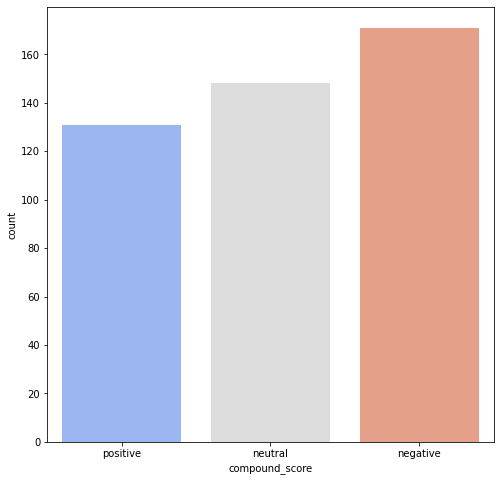

In [146]:
plt.figure(figsize = (8,8)) 
sns.countplot(df['compound_score'],palette = 'coolwarm')